# Predicting Car Prices

Using a data set of sold cars, we'll train a model to predict/suggest the price of a car. 

In [1]:
import pandas as pd
pd.options.display.max_columns = 99
columns = ['symboling', 'normalized-losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=columns)
cars.head()

,symboling,normalized-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Numeric columns that can be used for prediction:
-  symboling
-  normalized_losses
-  wheel_base
-  num_doors
-  length
-  width
-  height
-  curb_weight
-  num_cylinders
-  engine_size
-  bore
-  stroke
-  compression_ratio
-  horsepower
-  peak_rpm
-  city_mpg
-  highway_mpg

'price' will be the target column

In [3]:
# Replace '?' with nan
import numpy as np
cars = cars.replace('?', np.nan)

In [4]:
# Clean 'num_doors' column
cars['num_doors'].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

The 'num_doors' column is recorded as strings. We need to replace each entry with a numeric value

In [5]:
# Create function to replace strings with int64 for num_doors
def replace_num(value):
    if value == 'four':
        return 4
    if value == 'two':
        return 2
    if value == 'three':
        return 3
    if value == 'five':
        return 5
    if value == 'six':
        return 6
    if value == 'eight':
        return 8
    if value == 'twelve':
        return 12
cars['num_doors'] = cars['num_doors'].apply(replace_num)

In [6]:
cars['num_doors'].value_counts()

4.0    114
2.0     89
Name: num_doors, dtype: int64

In [7]:
# Repeat for 'num_cylinders' column
cars['num_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_cylinders, dtype: int64

In [8]:
cars['num_cylinders'] = cars['num_cylinders'].apply(replace_num)
cars['num_cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_cylinders, dtype: int64

In [9]:
obj_to_num = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
cars[obj_to_num] = cars[obj_to_num].astype('float')

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null float64
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null int64
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [11]:
len(cars[cars['normalized-losses'].isnull()])

41

In [12]:
cars['normalized-losses'].value_counts(dropna=False).sort_index()

 65.0      5
 74.0      5
 77.0      1
 78.0      1
 81.0      2
 83.0      3
 85.0      5
 87.0      2
 89.0      2
 90.0      1
 91.0      8
 93.0      4
 94.0      5
 95.0      5
 98.0      1
 101.0     3
 102.0     5
 103.0     5
 104.0     6
 106.0     4
 107.0     1
 108.0     2
 110.0     2
 113.0     2
 115.0     3
 118.0     4
 119.0     2
 121.0     1
 122.0     4
 125.0     3
 128.0     6
 129.0     2
 134.0     6
 137.0     3
 142.0     1
 145.0     2
 148.0     4
 150.0     7
 153.0     2
 154.0     3
 158.0     2
 161.0    11
 164.0     2
 168.0     5
 186.0     1
 188.0     2
 192.0     2
 194.0     2
 197.0     2
 231.0     1
 256.0     1
NaN       41
Name: normalized-losses, dtype: int64

In [13]:
normalized_nan = cars[cars['normalized-losses'].isnull()]
normalized_nan

,symboling,normalized-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,2.0,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,6,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,2.0,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


The 41 rows containing null values for normalized-losses appear to be relatively complete. Dropping these rows would constitute a large loss of our data set, so we will instead replace any NaN with the average of the 'normalized-losses' column.

In [14]:
cars.head()

,symboling,normalized-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [15]:
cars.loc[cars['normalized-losses'].notnull(), 'normalized-losses'].mean()

122.0

In [16]:
import math
def replace_nan_for_mean(value):
    nl_avg = cars.loc[cars['normalized-losses'].notnull(), 'normalized-losses'].mean()
    if math.isnan(value):
        return nl_avg
    else:
        return value
cars['normalized-losses'] = cars['normalized-losses'].apply(replace_nan_for_mean)

In [17]:
cars['normalized-losses'].value_counts(dropna=False)

122.0    45
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
94.0      5
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
65.0      5
102.0     5
148.0     4
106.0     4
93.0      4
118.0     4
115.0     3
154.0     3
125.0     3
137.0     3
101.0     3
83.0      3
194.0     2
110.0     2
145.0     2
119.0     2
197.0     2
108.0     2
188.0     2
129.0     2
81.0      2
164.0     2
192.0     2
158.0     2
153.0     2
87.0      2
89.0      2
113.0     2
121.0     1
98.0      1
186.0     1
78.0      1
107.0     1
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized-losses, dtype: int64

Now that the normalized-losses column is cleaned, we'll explore other columns with nan values.

In [18]:
obj_to_num

['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

In [19]:
cars['bore'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08,  nan, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [20]:
cars['bore'].value_counts(dropna=False).sort_index(ascending=False)

 3.94     2
 3.80     2
 3.78     8
 3.76     1
 3.74     3
 3.70     5
 3.63     2
 3.62    23
 3.61     1
 3.60     1
 3.59     3
 3.58     6
 3.54     6
 3.50     2
 3.47     2
 3.46     9
 3.43     8
 3.39     6
 3.35     4
 3.34     1
 3.33     2
 3.31     8
 3.27     7
 3.24     2
 3.19    20
 3.17     3
 3.15    15
 3.13     2
 3.08     1
 3.05     6
 3.03    12
 3.01     5
 2.99     1
 2.97    12
 2.92     1
 2.91     7
 2.68     1
 2.54     1
NaN       4
Name: bore, dtype: int64

Since only 4 rows are empty, we'll drop these 4, which should also take care of the 'stroke' columns missing values

In [21]:
cars['stroke'].value_counts(dropna=False).sort_index(ascending=False)

 4.17     2
 3.90     3
 3.86     4
 3.64     5
 3.58     6
 3.54     4
 3.52     5
 3.50     6
 3.47     4
 3.46     8
 3.41     6
 3.40    20
 3.39    13
 3.35     9
 3.29     9
 3.27     6
 3.23    14
 3.21     1
 3.19     6
 3.16     1
 3.15    14
 3.12     1
 3.11     6
 3.10     2
 3.08     2
 3.07     6
 3.03    14
 2.90     3
 2.87     1
 2.80     2
 2.76     1
 2.68     2
 2.64    11
 2.36     1
 2.19     2
 2.07     1
NaN       4
Name: stroke, dtype: int64

In [22]:
cars['horsepower'].value_counts(dropna=False).sort_index(ascending=False)

 288.0     1
 262.0     1
 207.0     3
 200.0     1
 184.0     2
 182.0     3
 176.0     2
 175.0     1
 162.0     2
 161.0     2
 160.0     6
 156.0     2
 155.0     2
 154.0     1
 152.0     3
 145.0     5
 143.0     1
 142.0     1
 140.0     1
 135.0     1
 134.0     1
 123.0     4
 121.0     3
 120.0     1
 116.0     9
 115.0     1
 114.0     6
 112.0     2
 111.0     4
 110.0     8
 106.0     1
 102.0     5
 101.0     6
 100.0     2
 97.0      5
 95.0      7
 94.0      2
 92.0      4
 90.0      3
 88.0      6
 86.0      4
 85.0      3
 84.0      5
 82.0      5
 78.0      1
 76.0      5
 73.0      3
 72.0      1
 70.0     11
 69.0     10
 68.0     19
 64.0      1
 62.0      6
 60.0      1
 58.0      1
 56.0      2
 55.0      1
 52.0      2
 48.0      1
NaN        2
Name: horsepower, dtype: int64

In [23]:
cars['peak_rpm'].value_counts(dropna=False).sort_index(ascending=False)

 6600.0     2
 6000.0     9
 5900.0     3
 5800.0     7
 5750.0     1
 5600.0     1
 5500.0    37
 5400.0    13
 5300.0     1
 5250.0     7
 5200.0    23
 5100.0     3
 5000.0    27
 4900.0     1
 4800.0    36
 4750.0     4
 4650.0     1
 4500.0     7
 4400.0     3
 4350.0     4
 4250.0     3
 4200.0     5
 4150.0     5
NaN         2
Name: peak_rpm, dtype: int64

In [24]:
cars['price'].value_counts(dropna=False).sort_index(ascending=False)

 45400.0    1
 41315.0    1
 40960.0    1
 37028.0    1
 36880.0    1
 36000.0    1
 35550.0    1
 35056.0    1
 34184.0    1
 34028.0    1
 32528.0    1
 32250.0    1
 31600.0    1
 30760.0    1
 28248.0    1
 28176.0    1
 25552.0    1
 24565.0    1
 23875.0    1
 22625.0    1
 22470.0    1
 22018.0    1
 21485.0    1
 21105.0    1
 20970.0    1
 19699.0    1
 19045.0    1
 18950.0    1
 18920.0    1
 18620.0    1
           ..
 6989.0     1
 6938.0     1
 6918.0     1
 6855.0     1
 6849.0     1
 6795.0     1
 6785.0     1
 6695.0     1
 6692.0     2
 6669.0     1
 6649.0     1
 6575.0     1
 6529.0     1
 6488.0     1
 6479.0     1
 6377.0     1
 6338.0     1
 6295.0     1
 6229.0     2
 6189.0     1
 6095.0     1
 5572.0     2
 5499.0     1
 5399.0     1
 5389.0     1
 5348.0     1
 5195.0     1
 5151.0     1
 5118.0     1
NaN         4
Name: price, Length: 187, dtype: int64

In [25]:
cars = cars.dropna()

Now we will normalize all numeric data that will be used for prediction.

In [26]:
# Select columns from cars with continuous variables
continuous_columns = ['normalized-losses', 'wheel_base', 'length', 'width', 
                'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
                'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
                'highway_mpg', 'price']

numeric_cars = cars[continuous_columns]

In [27]:
# Confirm that all null values are managed
numeric_cars.isnull().sum()

normalized-losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [28]:
# Normalize columns
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

## Univariate KNN

Before we get into complex analysis, we'll experiment with different hyperparameters and columns to get a sense for the data. 

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# create a function that performs KNN and returns RMSE
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    a = round((3/4) * len(df)) # gets index 3/4 way down df
    train_df = df_shuffled[:a]
    test_df = df_shuffled[a:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

In [45]:
# Perform default KNN for each column in numeric_cars against 'price'
default_rmse = {}
test_cols = ['normalized-losses', 'wheel_base', 'length', 'width', 
                'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
                'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
                'highway_mpg']
for col in test_cols:
    rmse = (knn_train_test(col, 'price', numeric_cars))
    default_rmse[col] = rmse
    
    

In [46]:
pd.Series(default_rmse).sort_values()

curb_weight          3084.273419
engine_size          3171.867401
city_mpg             3675.041880
width                3709.019434
highway_mpg          4131.277201
horsepower           4550.010749
compression_ratio    5096.504099
length               5260.713473
wheel_base           5771.642750
bore                 5995.115904
stroke               6234.768974
peak_rpm             6514.248899
normalized-losses    6691.161999
height               7982.664949
dtype: float64

Now we'll vary k (the number of nearest neighbors) to explore optimal values.

In [86]:
# Create knn fuction that can vary k
def knn_train_test_k(train_col, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    a = round((3/4) * len(df)) # gets index 3/4 way down df
    train_df = df_shuffled[:a]
    test_df = df_shuffled[a:]
    
    k_list = [1, 3, 5, 7, 9]
    k_rmse = {}
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predictions = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse ** (1/2)
        k_rmse[k] = rmse
    return k_rmse

In [87]:
k_rmses = {}
for col in test_cols:
    rmse = knn_train_test_k(col, 'price', numeric_cars)
    k_rmses[col] = rmse
k_rmses

{'bore': {1: 6024.2161799966425,
  3: 5976.832173957048,
  5: 5995.115904425868,
  7: 6116.0791888028625,
  9: 5973.632081412811},
 'city_mpg': {1: 4805.300573758802,
  3: 3891.1166099491566,
  5: 3675.0418801468554,
  7: 3623.745988586385,
  9: 4055.9218797011713},
 'compression_ratio': {1: 4765.611197247771,
  3: 4589.625354122458,
  5: 5096.504099053259,
  7: 5660.042521091271,
  9: 6254.368058851863},
 'curb_weight': {1: 5103.185798270201,
  3: 3554.1330912182502,
  5: 3084.2734194350105,
  7: 2928.318410600279,
  9: 2744.663488550219},
 'engine_size': {1: 2569.2239141097325,
  3: 2768.704045685019,
  5: 3171.8674012060046,
  7: 3194.923230529897,
  9: 2927.3653903029635},
 'height': {1: 9660.569785645841,
  3: 8324.506117315443,
  5: 7982.664949230092,
  7: 7865.607050829658,
  9: 7625.072018127816},
 'highway_mpg': {1: 4528.756242520309,
  3: 4491.859958735234,
  5: 4131.277200818168,
  7: 3756.331451345041,
  9: 3349.0293999621294},
 'horsepower': {1: 3349.458155806697,
  3: 400

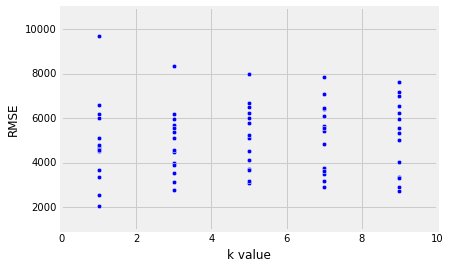

In [88]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

for k,v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

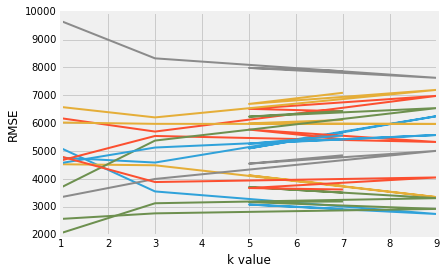

In [89]:
for k,v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,linewidth=2)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [80]:
# Create knn fuction that can accept multiple columns
def knn_train_test_cols(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    a = round((3/4) * len(df)) # gets index 3/4 way down df
    train_df = df_shuffled[:a]
    test_df = df_shuffled[a:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

In [78]:
two_best = ['width', 'engine_size']
three_best = ['width', 'engine_size','curb_weight']
four_best = ['width', 'engine_size', 'curb_weight', 'horsepower']
five_best = ['width', 'engine_size', 'curb_weight', 'horsepower', 'city_mpg']

In [79]:
bests_lists = [two_best, three_best, four_best, five_best]

In [81]:
bests_rmses = {}
i = 2
for each in bests_lists:
    rmse = knn_train_test_cols(each, 'price', numeric_cars)
    bests_rmses[i] = rmse
    i += 1
    
pd.Series(bests_rmses)

2    2251.801975
3    2193.390539
4    2537.253460
5    2423.571358
dtype: float64

In [91]:
def knn_train_test_cols_k(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    a = round((3/4) * len(df)) # gets index 3/4 way down df
    train_df = df_shuffled[:a]
    test_df = df_shuffled[a:]
    
    k_list = [i for i in range(1,26)]
    k_rmse = {}
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predictions = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse ** (1/2)
        k_rmse[k] = rmse
    return k_rmse

In [92]:
top_three = [two_best, three_best, five_best]
top_rmses = {}
i = 1
for each in top_three:
    rmses = knn_train_test_cols_k(each, 'price', numeric_cars)
    top_rmses[i] = rmses
    i += 1

top_rmses

{1: {1: 2034.1422895576077,
  2: 1854.7379110672214,
  3: 1946.4679354181799,
  4: 2234.594423375116,
  5: 2251.8019754558054,
  6: 2448.478282738417,
  7: 2548.5237721260983,
  8: 2490.694811730713,
  9: 2445.2601886455554,
  10: 2522.3389072281043,
  11: 2664.9936576051655,
  12: 2732.843944110017,
  13: 2754.1565979131256,
  14: 2857.282604301872,
  15: 2902.735282309888,
  16: 2911.061838908256,
  17: 2940.5570280170023,
  18: 2943.2810663125233,
  19: 2974.9046144515983,
  20: 2997.3082355864876,
  21: 3089.8992068074654,
  22: 3165.804711883877,
  23: 3223.7246861295785,
  24: 3306.970062037293,
  25: 3364.944681412559},
 2: {1: 1959.2384734465923,
  2: 1882.9862807076777,
  3: 1740.029711192695,
  4: 1773.3128719057634,
  5: 2193.390539210927,
  6: 2214.81903548658,
  7: 2214.471267379105,
  8: 2407.3242039485804,
  9: 2436.9999119266404,
  10: 2225.5662570643303,
  11: 2190.0789485687924,
  12: 2300.616854176771,
  13: 2306.337046966693,
  14: 2402.4421683437863,
  15: 2481.326

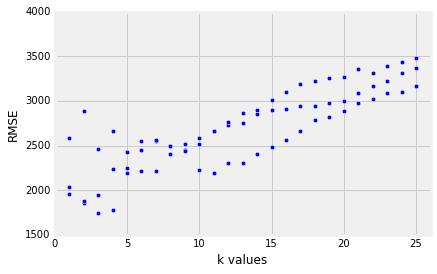

In [95]:
for k,v in top_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k values')
    plt.ylabel('RMSE')
    plt.xlim(0,26)

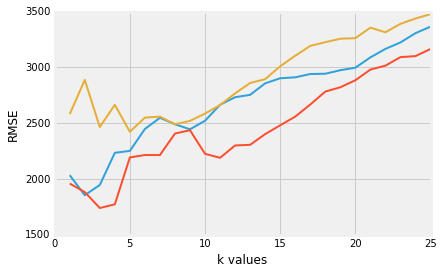

In [97]:
for k,v in top_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,linewidth=2)
    plt.xlabel('k values')
    plt.ylabel('RMSE')